In [2]:
library(readxl)
library(dplyr)

customer_r <- read_excel("r_practice/customer_r.xlsx")
reservation_r <- read_excel("r_practice/reservation_r.xlsx")
order_info_r <- read_excel("r_practice/order_info_r.xlsx")
item_r <- read_excel("r_practice/item_r.xlsx")

In [3]:
total_amt <- order_info_r %>% 
group_by(RESERV_NO) %>% 
summarise(amt_daily=sum(SALES/1000)) %>% 
arrange(RESERV_NO)

total_amt

RESERV_NO,amt_daily
2019060301,140
2019060601,152
2019060701,48
2019061601,105
2019061801,48
2019062001,10
2019062201,48
2019062601,8
2019062901,54
2019070101,50


In [5]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

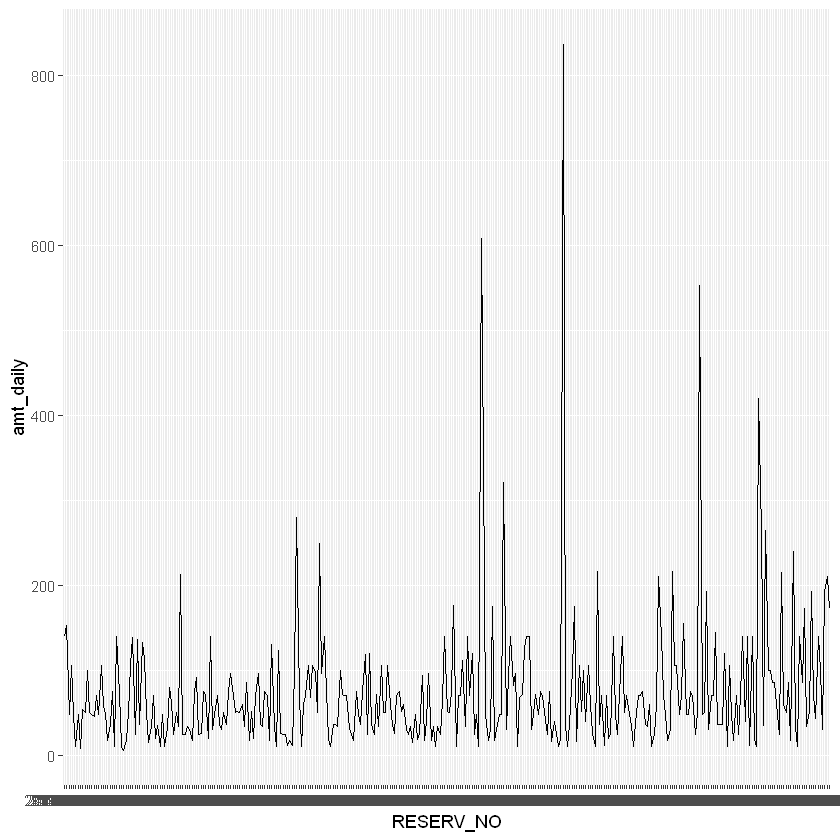

In [7]:
ggplot(total_amt,aes(x=RESERV_NO,y=amt_daily,group=1))+geom_line()

In [8]:
total_amt <- order_info_r %>% 
mutate(month=substr(RESERV_NO,1,6)) %>% 
group_by(month) %>% 
summarise(amt_monthly=sum(SALES/1000))

total_amt

month,amt_monthly
201906,613
201907,1744
201908,1622
201909,1586
201910,3333
201911,5197
201912,10862


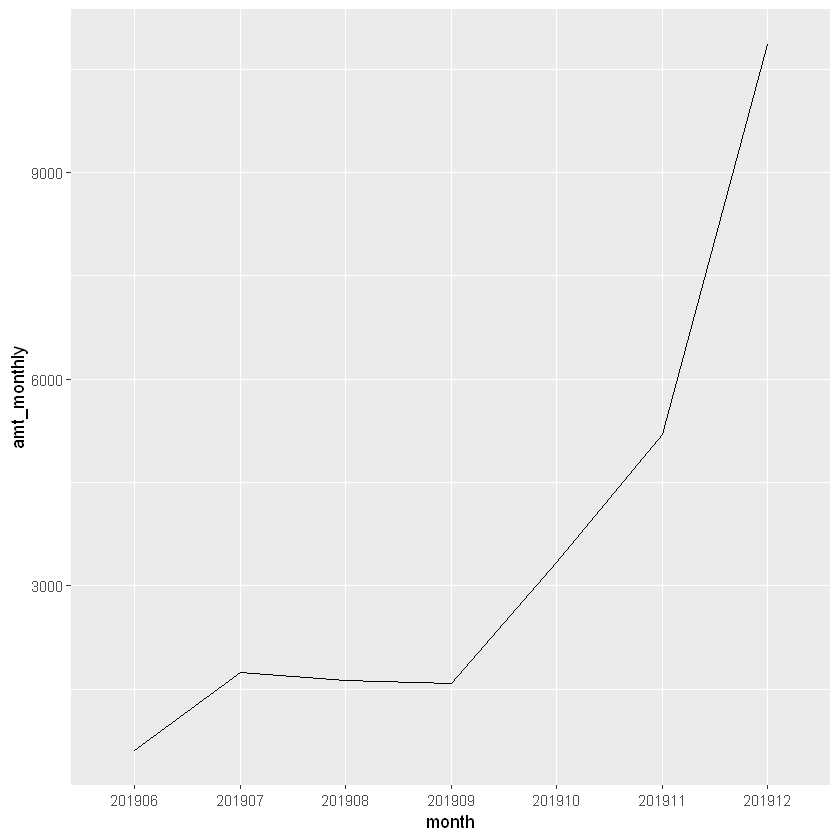

In [10]:
ggplot(total_amt,aes(x=month,y=amt_monthly,group=1))+geom_line()

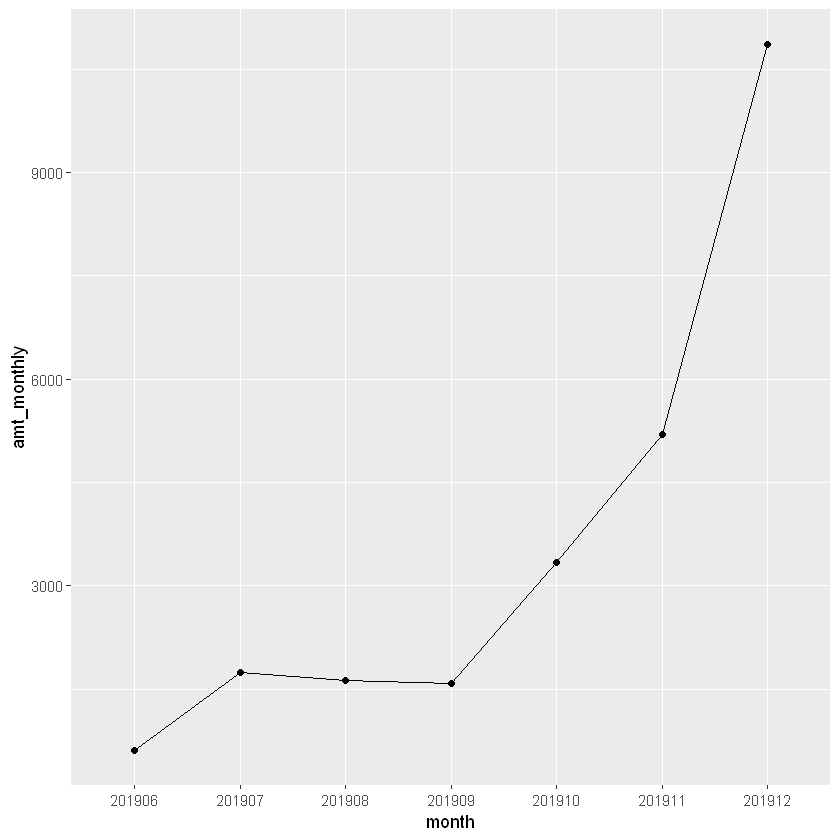

In [11]:
ggplot(total_amt,aes(x=month,y=amt_monthly,group=1))+
geom_line()+geom_point()

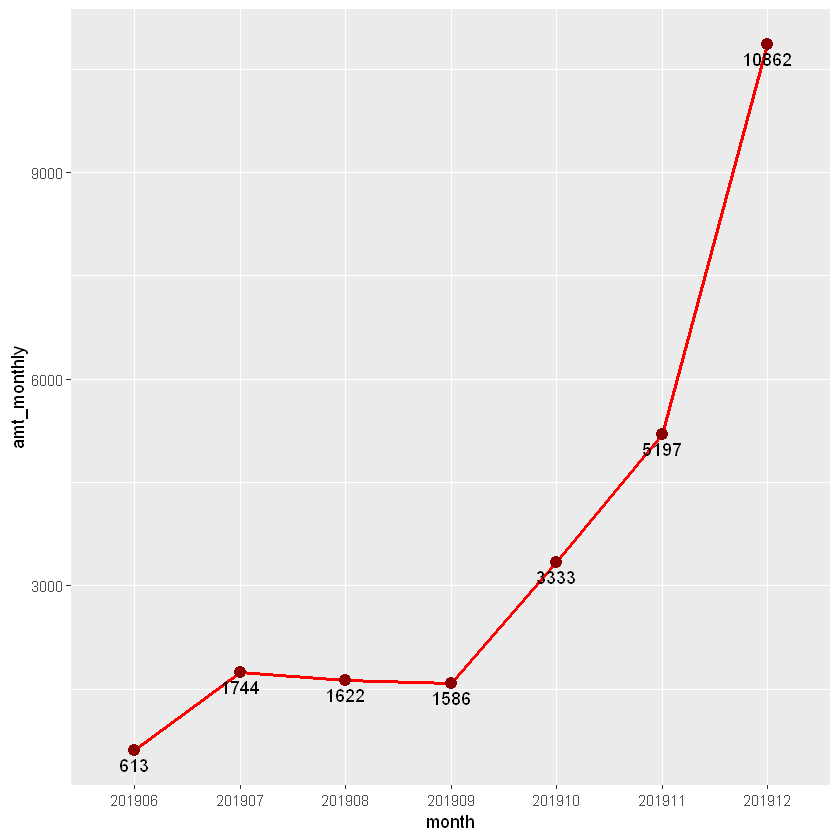

In [12]:
ggplot(total_amt,aes(x=month,y=amt_monthly,group=1,label=amt_monthly))+
geom_line(color="red",size=1)+geom_point(color="darkred",size=3)+
geom_text(vjust=1.5,hjust=0.5)

In [13]:
head(ToothGrowth)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


In [14]:
df <- ToothGrowth %>% 
group_by(dose) %>% # 투여양(dose)으로 그룹화
summarise(sd=sd(len),len=mean(len)) # 표준편차(sd), 평균(mean)

df # dose에 따른 표준편차(sd)와 평균(mean)

dose,sd,len
0.5,4.499763,10.605
1.0,4.415436,19.735
2.0,3.774150,26.100


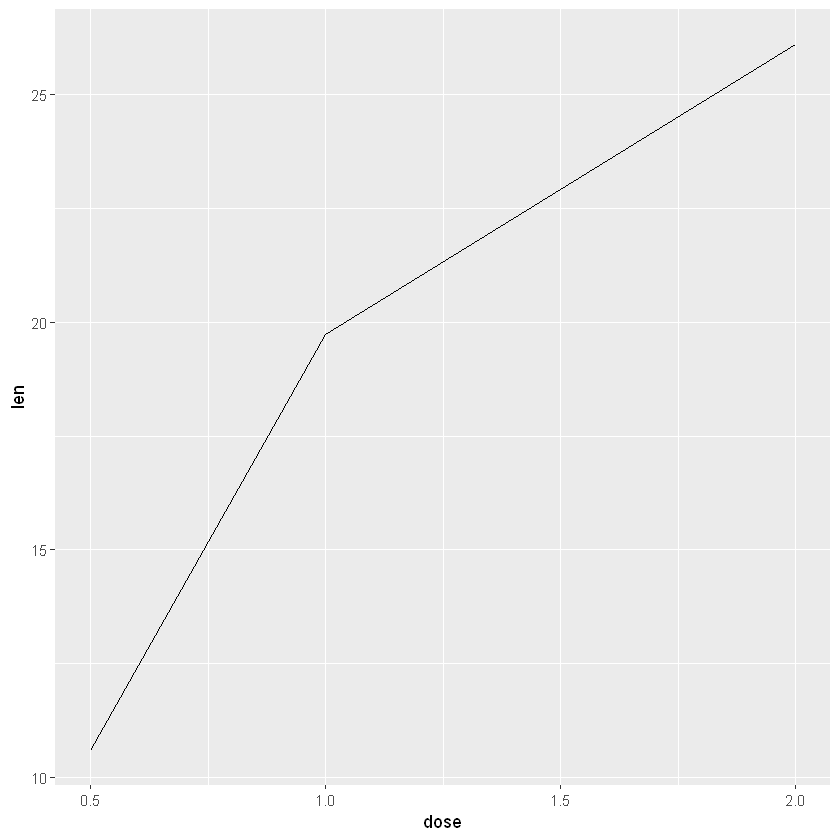

In [15]:
ggplot(df,aes(dose,len)) +# x축과 y축은 생략 가능
geom_line(aes(group=1)) #geom_line : 선그래프

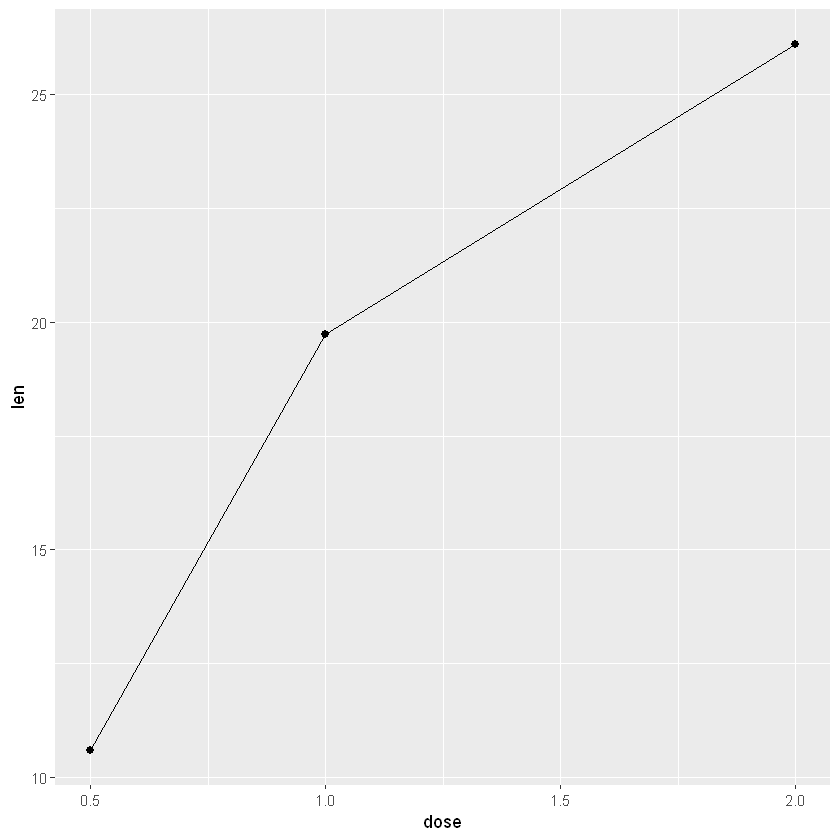

In [18]:
ggplot(df,aes(dose,len)) +# x축과 y축은 생략 가능
geom_line(aes(group=1))+ #geom_line : 선그래프
geom_point(size=2) #geom_point : 점

In [20]:
df2 <- ToothGrowth %>% 
group_by(dose,supp) %>% # dose와 supp로 그룹화시킬 거다
summarise(sd=sd(len),len=mean(len))

df2

`summarise()` has grouped output by 'dose'. You can override using the `.groups` argument.


dose,supp,sd,len
0.5,OJ,4.459709,13.23
0.5,VC,2.746634,7.98
1.0,OJ,3.910953,22.70
1.0,VC,2.515309,16.77
2.0,OJ,2.655058,26.06
2.0,VC,4.797731,26.14


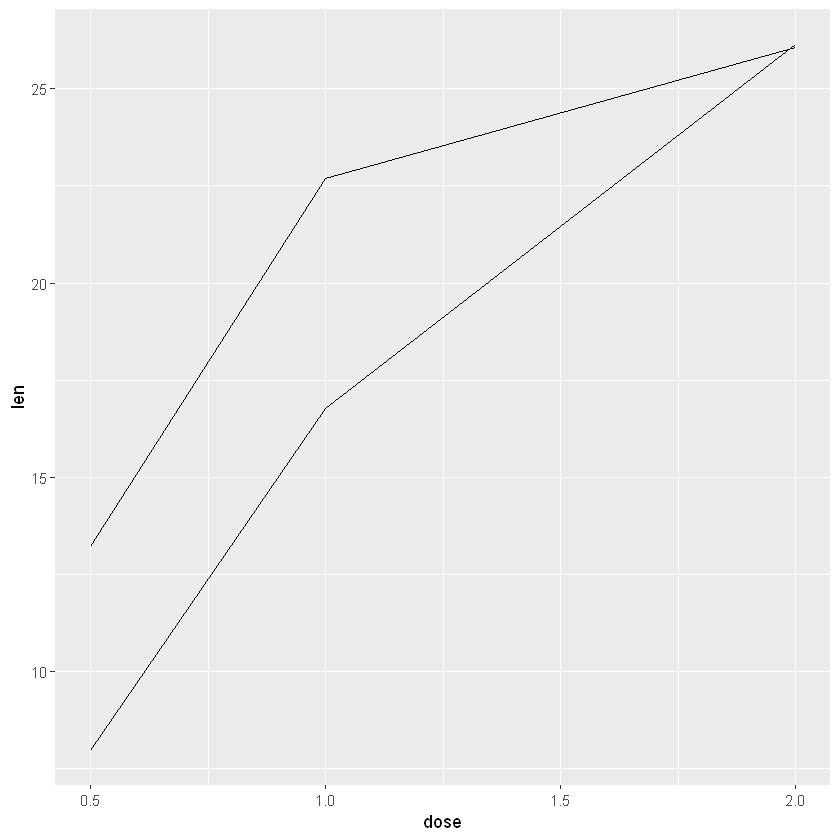

In [21]:
ggplot(df2,aes(dose,len))+
geom_line(aes(group=supp))

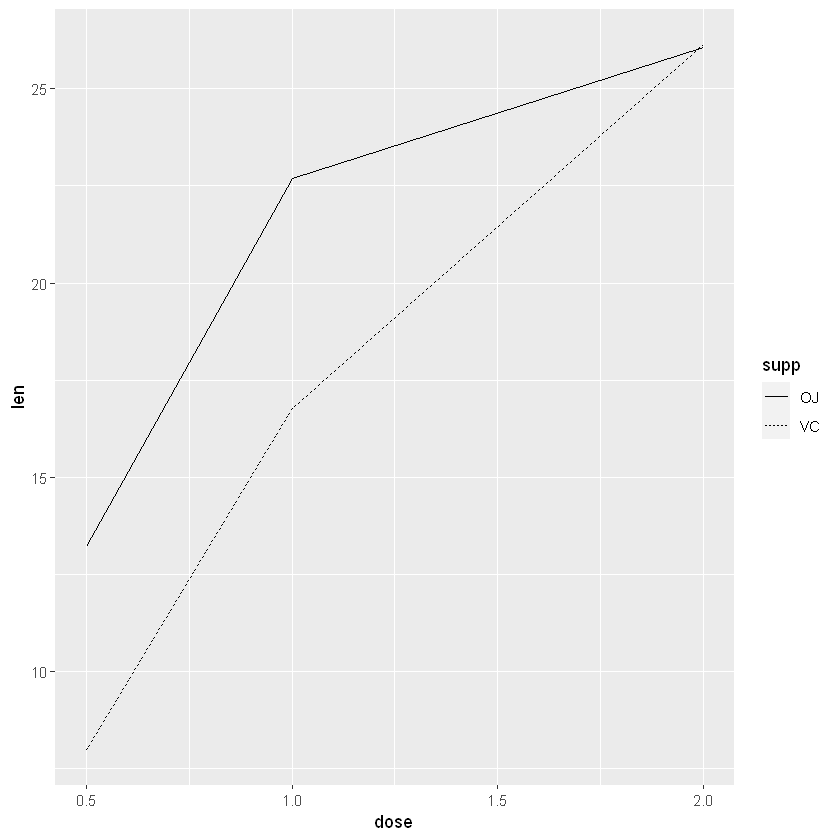

In [23]:
ggplot(df2,aes(dose,len))+
geom_line(aes(group=supp,linetype=supp))+ # supp 별로 다르게
geom_point(size=2) # 선그래프의 라인 사이즈가 2

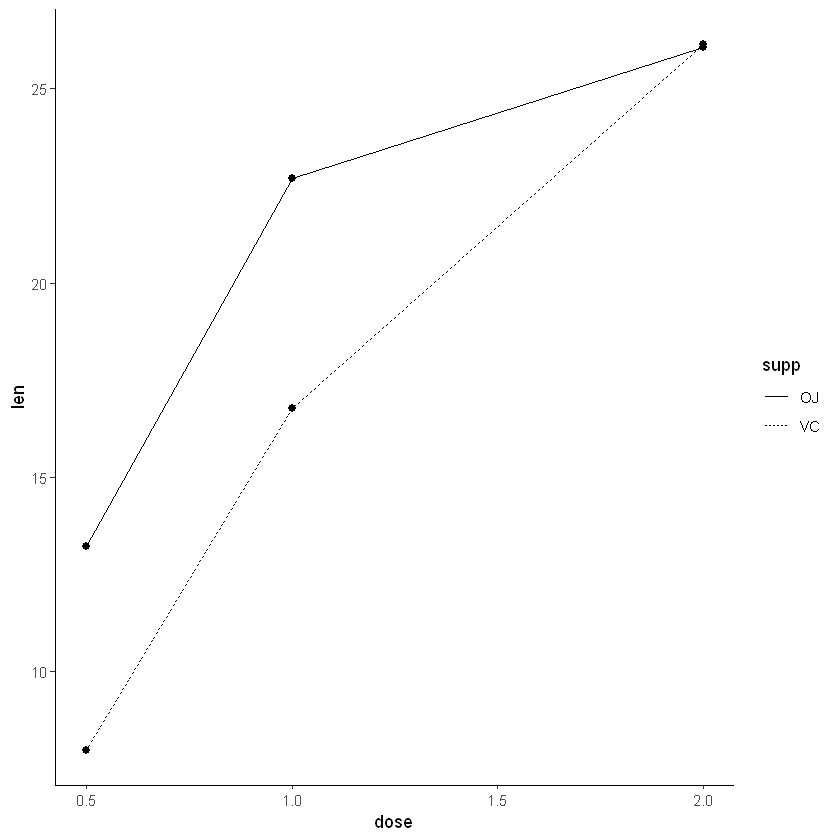

In [24]:
ggplot(df2,aes(dose,len)) +
    geom_line(aes(group=supp,linetype=supp)) +
    geom_point(size=2)+
    theme_classic()

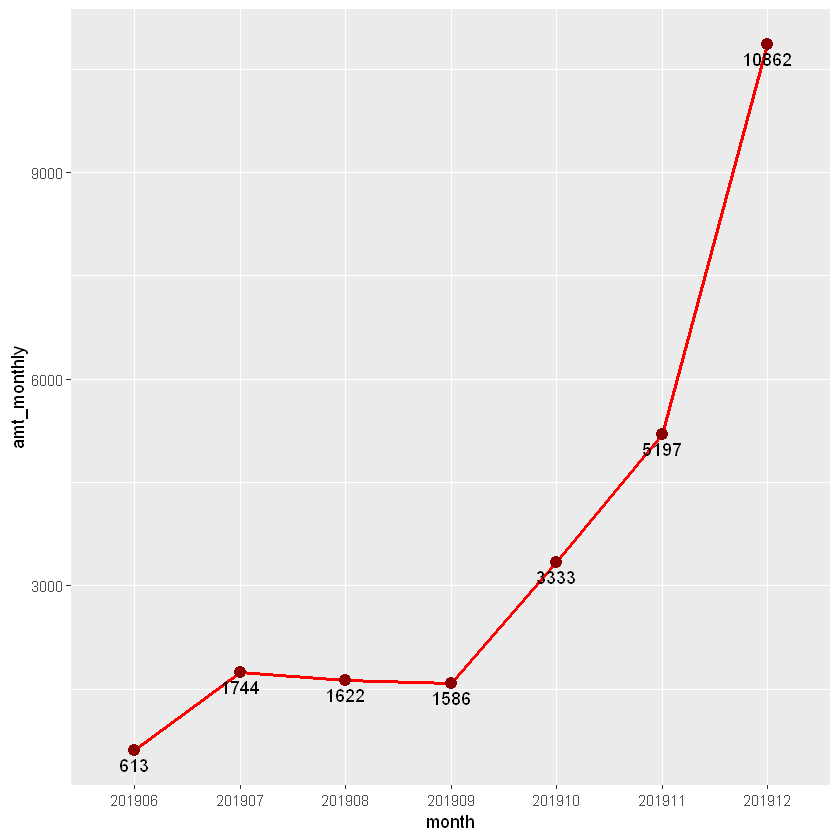

In [25]:
ggplot(total_amt,aes(x=month,y=amt_monthly,group=1,label=amt_monthly))+
geom_line(color="red",size=1)+geom_point(color="darkred",size=3)+
geom_text(vjust=1.5,hjust=0.5)

In [26]:
df_boxplot_graph <- inner_join(order_info_r,item_r,by="ITEM_ID")
df_boxplot_graph

ORDER_NO,ITEM_ID,RESERV_NO,QUANTITY,SALES,PRODUCT_NAME,PRODUCT_DESC,CATEGORY_ID,PRICE
191228137840110010,M0003,2019122805,1,17000,PIZZA,피자,FOOD,17000
191228137837810010,M0001,2019122806,10,240000,SPECIAL_SET,온라인_전용상품,COMBO,24000
191228547385810010,M0003,2019122807,2,34000,PIZZA,피자,FOOD,17000
191228567831310010,M0008,2019122808,1,10000,SANDWICH,샌드위치,FOOD,10000
191228567430310010,M0005,2019122809,4,140000,STEAK,스테이크,FOOD,35000
191228137860010010,M0005,2019122810,2,70000,STEAK,스테이크,FOOD,35000
191228137860010010,M0009,2019122810,2,16000,WINE,와인,BEVERAGE,8000
191229107864610010,M0005,2019122901,4,140000,STEAK,스테이크,FOOD,35000
191229107864610010,M0009,2019122901,4,32000,WINE,와인,BEVERAGE,8000
191229137425710010,M0003,2019122902,2,34000,PIZZA,피자,FOOD,17000


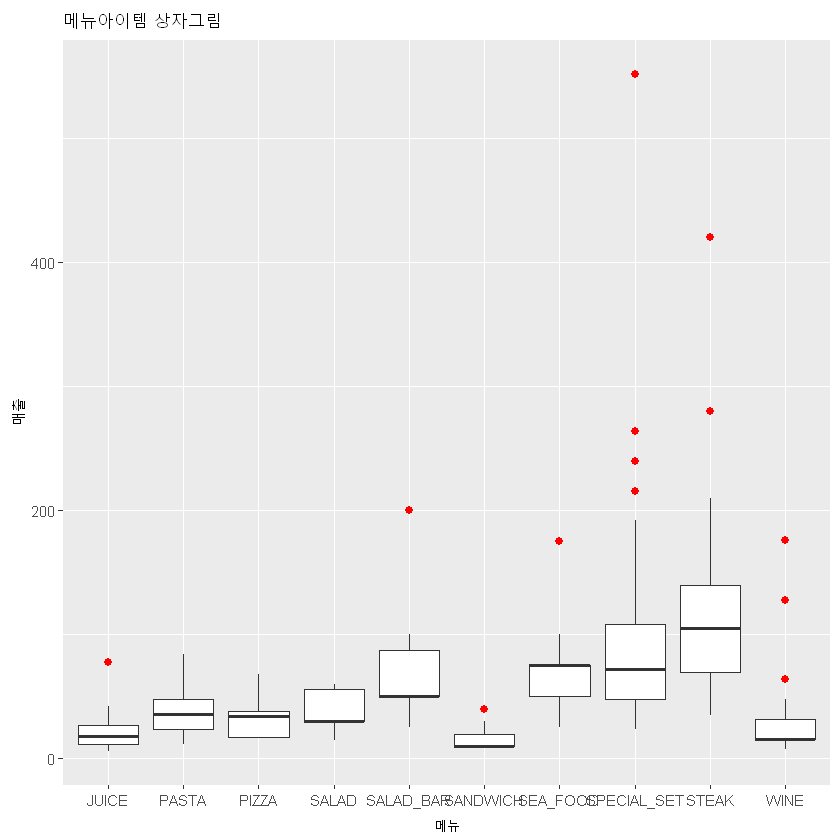

In [28]:
ggplot(df_boxplot_graph,aes(PRODUCT_NAME,SALES/1000)) +
geom_boxplot(width=0.8,outlier.size=2,outlier.colour="red") +
labs(title="메뉴아이템 상자그림",x="메뉴",y="매출")